In [130]:
import os
import sys
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import ast
from sklearn.ensemble import RandomForestRegressor
sys.path.insert(0, os.path.abspath("../../" + 'src/scraping'))
import metadata as meta
sys.path.insert(0, os.path.abspath("../../" + "src/modeling"))
import basic_stats as basic
import time

In [48]:
big_df = pd.read_csv('../../data/local/fortnite/video_data/merged_df.csv').drop("Unnamed: 0",axis=1)

In [49]:
all_meta = pd.read_csv("../../data/local/fortnite/video_data/fortnite_master_metadata.csv")

In [71]:
save_dir = "../../data/local/fortnite/thumbnails/"
chan_id = "UC_q5WZtFp36adwqhKpZzxwQ" # Sypher
chan_ids = all_meta['channelId'].value_counts().index
for chan_id in chan_ids:
    chan_df = all_meta[all_meta['channelId'] == chan_id]
    chan_vids = meta.download_df_thumbs(chan_df,save_dir,'medium')
chan_basic_df = basic.basic_image_stats(save_dir, "../../data/local/fortnite/video_data/","bleh")
full_chan = all_meta.merge(chan_basic_df,on='videoId')
big_df = pd.concat([big_df,full_chan],sort=True)
big_df = big_df.drop_duplicates(subset='videoId')

Thumbnail Download: 0 of 100
Thumbnail Download: 25 of 100
Thumbnail Download: 50 of 100
Thumbnail Download: 75 of 100
Thumbnails Successfully Downloaded!
Thumbnail Download: 0 of 100
Thumbnail Download: 25 of 100
Thumbnail Download: 50 of 100
Thumbnail Download: 75 of 100
Thumbnails Successfully Downloaded!
Thumbnail Download: 0 of 100
Thumbnail Download: 25 of 100
Thumbnail Download: 50 of 100
Thumbnail Download: 75 of 100
Thumbnails Successfully Downloaded!
Thumbnail Download: 0 of 100
Thumbnail Download: 25 of 100
Thumbnail Download: 50 of 100
Thumbnail Download: 75 of 100
Thumbnails Successfully Downloaded!
Thumbnail Download: 0 of 100
Thumbnail Download: 25 of 100
Thumbnail Download: 50 of 100
Thumbnail Download: 75 of 100
Thumbnails Successfully Downloaded!
Thumbnail Download: 0 of 100
Thumbnail Download: 25 of 100
Thumbnail Download: 50 of 100
Thumbnail Download: 75 of 100
Thumbnails Successfully Downloaded!
Thumbnail Download: 0 of 100
Thumbnail Download: 25 of 100
Thumbnail D

Thumbnail Download: 25 of 100
Thumbnail Download: 50 of 100
Thumbnail Download: 75 of 100
Thumbnails Successfully Downloaded!
Thumbnail Download: 0 of 100
Thumbnail Download: 25 of 100
Thumbnail Download: 50 of 100
Thumbnail Download: 75 of 100
Thumbnails Successfully Downloaded!
Thumbnail Download: 0 of 100
Thumbnail Download: 25 of 100
Thumbnail Download: 50 of 100
Thumbnail Download: 75 of 100
Thumbnails Successfully Downloaded!
Thumbnail Download: 0 of 100
Thumbnail Download: 25 of 100
Thumbnail Download: 50 of 100
Thumbnail Download: 75 of 100
Thumbnails Successfully Downloaded!
Thumbnail Download: 0 of 99
Thumbnail Download: 25 of 99
Thumbnail Download: 50 of 99
Thumbnail Download: 75 of 99
Thumbnails Successfully Downloaded!
Thumbnail Download: 0 of 99
Thumbnail Download: 25 of 99
Thumbnail Download: 50 of 99
Thumbnail Download: 75 of 99
Thumbnails Successfully Downloaded!
Thumbnail Download: 0 of 99
Thumbnail Download: 25 of 99
Thumbnail Download: 50 of 99
Thumbnail Download: 7

In [72]:
comb_df = big_df.drop_duplicates(subset='videoId')

In [14]:
full_sypher = all_meta.merge(sypher_vids,on='videoId')

In [40]:
# (big_df['viewCount'] / 1000).describe()

In [26]:
sorted_df = big_df.sort_values(by='position',axis=0).reset_index()
# pos = sorted_df['position']
# views = sorted_df['viewCount']

In [146]:
# sorted_df['emotions'].value_counts()

In [112]:
# sorted_df['num_rgb']

In [145]:
# sorted_df[emotion == True]

Emotion: angry


count    17.000000
mean      0.193462
std       0.829647
min      -1.295741
25%      -0.301868
50%       0.054036
75%       0.477120
max       2.125281
Name: z_views, dtype: float64

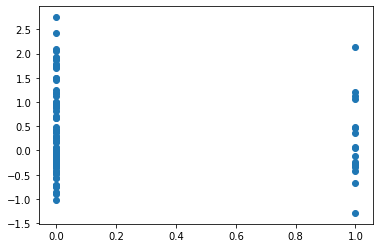

Emotion: happy


count    21.000000
mean      0.296025
std       0.781796
min      -0.559909
25%      -0.127389
50%       0.169939
75%       0.384649
max       2.755193
Name: z_views, dtype: float64

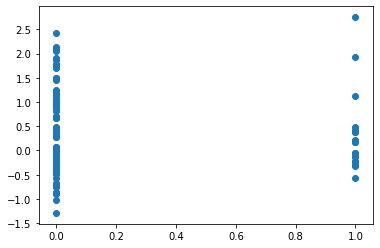

Emotion: sad


count    9.000000
mean    -0.065563
std      0.762478
min     -0.739990
25%     -0.307306
50%     -0.278040
75%     -0.141449
max      1.899892
Name: z_views, dtype: float64

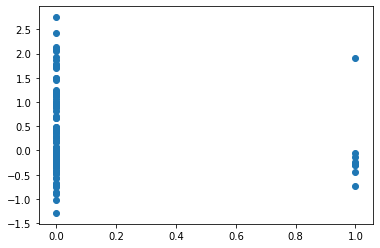

Emotion: fear


count    24.000000
mean      0.452787
std       0.845017
min      -0.761073
25%      -0.273876
50%       0.433260
75%       1.003750
max       1.874329
Name: z_views, dtype: float64

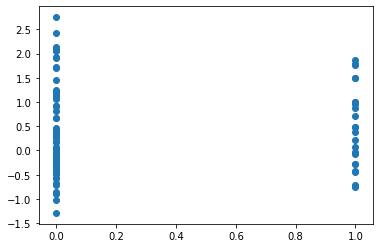

Emotion: neutral


count    29.000000
mean      0.491426
std       0.909653
min      -0.722125
25%      -0.230385
50%       0.287917
75%       1.008026
max       2.426124
Name: z_views, dtype: float64

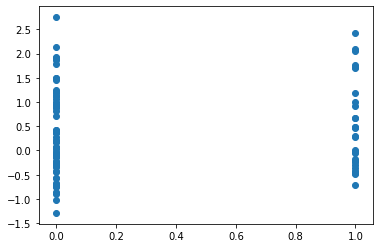

Emotion: surprise


count    21.000000
mean      0.269795
std       0.920324
min      -1.295741
25%      -0.559909
50%       0.267903
75%       1.124928
max       1.768369
Name: z_views, dtype: float64

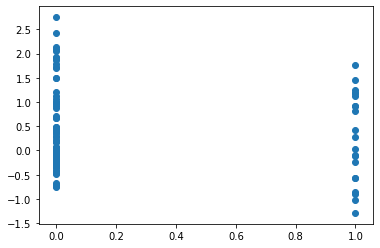

In [105]:
emotions = ['angry', 'happy', 'sad', 'fear', 'neutral', 'surprise']
for targ in emotions:
# targ = emotions[1]
    emotion = sorted_df['emotions'].apply(lambda x: targ in x if type(x) == str else x)
    print("Emotion:",targ)
    display(sorted_df[emotion == True]['z_views'].describe())
    plt.scatter(emotion,sorted_df['z_views'])
    plt.show()

count    200.000000
mean       0.625000
std        0.732844
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: emotions, dtype: float64

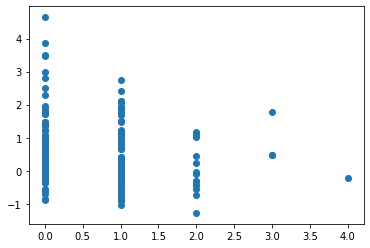

In [110]:
emotion = sorted_df['emotions'].apply(lambda x: len(ast.literal_eval(x)) if type(x) == str else 0)
# print("Emotion:",targ)
display(emotion.describe())
plt.scatter(emotion,sorted_df['z_views'])
# plt.show()

In [133]:
sorted_df.columns

Index(['index', 'videoId', 'numFaces', 'emotions', 'face_locations',
       'face_percent', 'age', 'gender', 'race', 'categoryId', 'channelId',
       'channelTitle', 'commentCount', 'date', 'defaultLanguage',
       'description', 'dislikeCount', 'duration', 'favoriteCount', 'likeCount',
       'tags', 'thumbnails', 'title', 'viewCount', 'z_comments', 'z_dislikes',
       'z_likes', 'z_views', 'position', 'thumbnailFilename', 'width',
       'height', 'size', 'num_rgb', 'mean_hue', 'mean_saturation',
       'mean_brightness', 'contrast', 'edge_score'],
      dtype='object')

In [103]:
basic_img_feats = ['num_rgb','mean_hue','mean_saturation','mean_brightness','contrast','edge_score']
meta_feats = ['z_views']
def get_corr(img_feats, meta_feats,df,sign):
    for col in meta_feats:
        for col2 in img_feats:
        #     col = 'z_views'
        #     col2 = 'contrast'
            step1 = df[df[col].notnull()]
            filtered = step1[step1[col2].notnull()]
            corr = np.corrcoef(filtered[col],filtered[col2])[0][1]
            if sign == "-":
                if corr < 0:
                    print(col, col2, corr)
                    print('---------------')
            else:
                if corr > 0:
                    print(col, col2, corr)
                    print('---------------')
# get_corr(basic_img_feats, meta_feats, big_df)

In [160]:
sorted_df['z_views'].describe()[['count','mean','50%']]

count    197.000000
mean       0.470532
50%        0.194955
Name: z_views, dtype: float64

In [17]:
def get_range(col_name, df):
    stats = df[col_name].describe()
    col_range = np.arange(stats['25%'],stats['max'],stats['std']/3)
    return col_range

In [24]:
def tune_params(df, c1, c2):
    baseline_stats = df['z_views'].describe()
    base_mean = baseline_stats['mean']
    base_median = baseline_stats['50%']
    print("baseline:     ",
          "count:",baseline_stats['count'],
          "mean:",baseline_stats['mean'].round(3),
          "median:",baseline_stats['50%'].round(3))
    # print('---------------------------------------')
    #['baseline',0,baseline_stats['count'],baseline_stats['mean'],baseline_stats['50%']]
    rel_stats = []
    c1_range = get_range(c1,df)
    c2_range = get_range(c2,df)
    for c1_cutoff in c1_range:
        for c2_cutoff in c2_range:
            filtered = df.apply(lambda x: x[c1] > c1_cutoff and x[c2] > c2_cutoff,axis=1)
            stats = df[filtered]['z_views'].describe()
            cur_count = stats['count']
            cur_mean = stats['mean']
            cur_median = stats['50%']
            cur_stats_list = [c1,c1_cutoff,c2,c2_cutoff,cur_count, cur_mean, cur_median]
            rel_stats.append(cur_stats_list)
    res_df = pd.DataFrame(rel_stats, columns=['col1','col1cutoff','col2','col2cutoff','count','mean','median'])
    not_null_df = res_df[res_df['mean'].notnull()]
    better_df = not_null_df[not_null_df.apply(
        lambda x: x['mean'] > base_mean and x['median'] > base_median,axis=1)]
    return better_df

In [66]:
c1 = 'num_rgb'
c2 = 'mean_saturation'
# comb_df = pd.concat([big_df,full_sypher],sort=True).drop_duplicates(subset='videoId')

In [86]:
print(comb_df[c1].describe())
print(comb_df[c2].describe())

count     8691.000000
mean     38674.577609
std       8016.534842
min          1.000000
25%      34437.000000
50%      40100.000000
75%      44493.500000
max      54100.000000
Name: num_rgb, dtype: float64
count    8691.000000
mean        0.548244
std         0.144017
min         0.000000
25%         0.453369
50%         0.547083
75%         0.638512
max         0.965595
Name: mean_saturation, dtype: float64


In [104]:
get_corr(basic_img_feats, meta_feats, comb_df, '-')

z_views mean_hue -0.010943508487803354
---------------
z_views mean_brightness -0.00046899716773006705
---------------
z_views contrast -0.028705867810860618
---------------


In [105]:
get_corr(basic_img_feats, meta_feats, comb_df, '+')

z_views num_rgb 0.04453263307200701
---------------
z_views mean_saturation 0.026305303970511302
---------------
z_views edge_score 0.016457377143015064
---------------


In [74]:
tuned_df = tune_params(comb_df)
tuned_df['mm_sum'] = tuned_df['mean'] + tuned_df['median']

baseline:      count: 8688.0 mean: -0.0 median: -0.273


In [88]:
top_df = tuned_df.sort_values(by='mm_sum',ascending=False)

In [112]:
rgb_cutoff = top_df['col1cutoff'].describe()['mean']
sat_cutoff = top_df['col2cutoff'].describe()['mean']

In [113]:
comb_df['z_views'].describe()

count    8.688000e+03
mean    -2.990242e-17
std      1.000058e+00
min     -2.289175e+00
25%     -6.040413e-01
50%     -2.726622e-01
75%      2.933374e-01
max      9.058706e+00
Name: z_views, dtype: float64

In [114]:
top_cut = comb_df[comb_df.apply(
    lambda x: x['num_rgb'] > rgb_cutoff and x['mean_saturation'] > sat_cutoff,axis=1)]
top_cut['z_views'].describe()

count    784.000000
mean       0.066850
std        1.003638
min       -1.365103
25%       -0.600385
50%       -0.185871
75%        0.389026
max        6.558268
Name: z_views, dtype: float64

In [141]:
top_200 = pd.read_csv('../../data/local/fortnite/video_data/merged_df.csv').drop("Unnamed: 0",axis=1)
full_views = top_200[top_200['z_views'].notnull()]

In [144]:
basic_img_feats

['num_rgb',
 'mean_hue',
 'mean_saturation',
 'mean_brightness',
 'contrast',
 'edge_score']

In [143]:
rf = RandomForestRegressor()
rf.fit(full_views[basic_img_feats],full_views[['position']])
rf.feature_importances_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([0.17936897, 0.1616059 , 0.15072933, 0.19304113, 0.1560668 ,
       0.15918786])

In [217]:
# baseline_stats = sorted_df['z_views'].describe()
# print("baseline:     ",
#       "count:",baseline_stats['count'],
#       "mean:",baseline_stats['mean'].round(3),
#       "median:",baseline_stats['50%'].round(3))
# # print('---------------------------------------')
# #['baseline',0,baseline_stats['count'],baseline_stats['mean'],baseline_stats['50%']]
# rel_stats = []
# c1 = 'num_rgb'
# c1_range = get_range(c1,sorted_df)
# c2 = 'mean_saturation'
# c2_range = get_range(c2, sorted_df)
# for c1_cutoff in c1_range:
#     for c2_cutoff in c2_range:
#         filtered = sorted_df.apply(lambda x: x[c1] > c1_cutoff and x[c2] > c2_cutoff,axis=1)
#         stats = sorted_df[filtered]['z_views'].describe()
#         cur_count = stats['count']
#         cur_mean = stats['mean']
#         cur_median = stats['50%']
#         cur_stats_list = [c1,c1_cutoff,c2,c2_cutoff,cur_count, cur_mean, cur_median]
#         rel_stats.append(cur_stats_list)
# res_df = pd.DataFrame(rel_stats, columns=['col1','col1cutoff','col2','col2cutoff','count','mean','median'])

baseline:      count: 197.0 mean: 0.471 median: 0.195


In [224]:
not_null_df = res_df[res_df['mean'].notnull()]
not_null_df[not_null_df.apply(lambda x: x['mean'] > .5 and x['median']> .2,axis=1)]

,col1,col1cutoff,col2,col2cutoff,count,mean,median
6,num_rgb,37527.250000,mean_saturation,0.751865,6.0,1.244212,1.575375
7,num_rgb,37527.250000,mean_saturation,0.794585,2.0,0.693384,0.693384
17,num_rgb,39888.107127,mean_saturation,0.751865,3.0,1.549299,2.505676
24,num_rgb,42248.964255,mean_saturation,0.580985,43.0,0.510101,0.267903
28,num_rgb,42248.964255,mean_saturation,0.751865,1.0,2.505676,2.505676
35,num_rgb,44609.821382,mean_saturation,0.580985,27.0,0.566492,0.384649
44,num_rgb,46970.678509,mean_saturation,0.495544,27.0,0.623996,0.321709
45,num_rgb,46970.678509,mean_saturation,0.538265,21.0,0.653347,0.321709
46,num_rgb,46970.678509,mean_saturation,0.580985,16.0,0.617125,0.326276
55,num_rgb,49331.535637,mean_saturation,0.495544,11.0,0.647302,0.267903


In [175]:
c1 = 'mean_saturation'
c1_stats = sorted_df[c1].describe()
c1_range = np.arange(c1_stats['25%'],c1_stats['75%'],c1_stats['std']/3)
c1_range

array([0.49554449, 0.53826456, 0.58098462, 0.62370469])

In [174]:
c1_stats

count    200.000000
mean       0.575213
std        0.128160
min        0.145420
25%        0.495544
50%        0.580491
75%        0.645000
max        0.931415
Name: mean_saturation, dtype: float64

In [153]:
sorted_df['z_views'].describe()

count    197.000000
mean       0.470532
std        0.963514
min       -1.295741
25%       -0.214567
50%        0.194955
75%        0.947598
max        4.664359
Name: z_views, dtype: float64

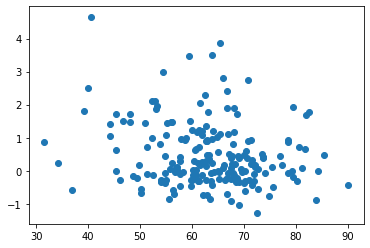

In [119]:
col = 'contrast'
print(sorted_df[col].describe())
plt.scatter(sorted_df['contrast'],sorted_df['z_views'])

In [149]:
sorted_df['contrast'].describe()

count    200.000000
mean      63.098340
std       10.047576
min       31.574609
25%       57.030288
50%       62.972601
75%       69.204950
max       90.110612
Name: contrast, dtype: float64

In [114]:
sorted_df.columns

Index(['index', 'videoId', 'numFaces', 'emotions', 'face_locations',
       'face_percent', 'age', 'gender', 'race', 'categoryId', 'channelId',
       'channelTitle', 'commentCount', 'date', 'defaultLanguage',
       'description', 'dislikeCount', 'duration', 'favoriteCount', 'likeCount',
       'tags', 'thumbnails', 'title', 'viewCount', 'z_comments', 'z_dislikes',
       'z_likes', 'z_views', 'position', 'thumbnailFilename', 'width',
       'height', 'size', 'num_rgb', 'mean_hue', 'mean_saturation',
       'mean_brightness', 'contrast', 'edge_score'],
      dtype='object')

In [226]:
sys.path.insert(0, os.path.abspath("../../" + 'src/scraping'))
import metadata as meta
sys.path.insert(0, os.path.abspath("../../" + "src/modeling"))
import basic_stats as basic

In [87]:
df = pd.read_csv("../../data/test/fortnite/video_data/fortnite_full_metadata.csv")
basic_stats_df = pd.read_csv("../../data/test/fortnite/video_data/basic_stats_04_27_20.csv")

In [88]:
basic_stats_df.set_index("videoId")
df.set_index("videoId")
df = df[df['channelId'].notnull()]

In [89]:
# for vid_id in basic_stats_df['videoId'].values:
#     if vid_id not in df['videoId'].values:
#         print(vid_id)

In [90]:
merged_df = df.merge(basic_stats_df,how="left",on="videoId")

In [91]:
merged_df.columns

Index(['categoryId', 'channelId', 'channelTitle', 'commentCount', 'date',
       'defaultLanguage', 'description', 'dislikeCount', 'duration',
       'favoriteCount', 'likeCount', 'tags', 'thumbnails', 'title', 'videoId',
       'viewCount', 'z_comments', 'z_dislikes', 'z_likes', 'z_views',
       'position', 'thumbnailFilename', 'size', 'num_rgb', 'unique_rgb_ratio',
       'mean_hue', 'mean_saturation', 'mean_brightness', 'contrast',
       'edge_score'],
      dtype='object')

In [85]:
datetime.now().strftime("_%m_%d_%y")

'_04_27_20'

In [117]:
s = str({"cmd":"LOG","devmac":"CC:50:E3:B0:21:8C","gid":"05", "BLEInfo":{"beacons": [{"mac":"4e:8c:c8:e5:1b:e8","rssi":"-79","msgtype":"iBeacon"},{"mac":"48:ee:a2:7f:38:76","rssi":"-42","msgtype":"iBeacon"},{"mac":"4e:8c:c8:e5:1b:e8","rssi":"-79","msgtype":"iBeacon"},{"mac":"48:ee:a2:7f:38:76","rssi":"-42","msgtype":"iBeacon"},{"mac":"4e:8c:c8:e5:1b:e8","rssi":"-77","msgtype":"iBeacon"},{"mac":"4e:8c:c8:e5:1b:e8","rssi":"-79","msgtype":"iBeacon"}]}})

In [129]:
s = '{\r\n  "cmd": "GROUPS"\r\n}'
s

'{\r\n  "cmd": "GROUPS"\r\n}'

'{\r\n  "cmd": "GROUPS"\r\n}'